In [244]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
import json
import pickle
from collections import Counter

## Facts:

- Total amount of texts: 8022
- Top 5 Colors: Red, Blue, Green, Yellow, Pink
- How many times 'secret' was texted: 
- peak use -- times of day and week
- unique users
- repreat users
- highly engaged users (over 15 texts)
- user groups/clusters

In [225]:
# Read in a prepared dataset
df = pd.read_csv('../data/napa_with_datetime.csv')
df.index = pd.to_datetime(df.datetime)
df.index.tz_localize('UTC').tz_convert('US/Eastern')
df['date'] = [x.date() for x in df.index]
df['hour'] = [x.hour for x in df.index]

In [187]:
# Total messages
print('Total messages = {}\n'.format(len(df)))

# Count of unique users
print('# of unique users: {}\n'.format(len(set(df.id))))

# Count of repeat users
print('# of repeat users: {}\n'.format(sum(df.id.value_counts() > 1)))

# Count of engaged users
print('# of engaged users: {}\n'.format(sum(df.id.value_counts() > 15)))

# Top 5 colors
print('Top 5 Colors:\n{}\n'.format(df.Body.str.lower().value_counts().head(5)))

# 'secret' message
print('# of "secret" texts: {}'.format(sum(df.Body.str.lower() == 'secret')))

Total messages = 8022

# of unique users: 464

# of repeat users: 374

# of engaged users: 169

Top 5 Colors:
red       710
blue      632
green     539
yellow    444
pink      403
Name: Body, dtype: int64

# of "secret" texts: 163


In [92]:
# Read in the pickled dataset
with open('../data/napa.pickle', 'rb') as f:
    ccdf = pickle.load(f)
    
ccdf.columns = ['min_date', 'ct']
ccdf = ccdf.reset_index()

ccdf['pct'] = ccdf.ct/sum(ccdf.ct)
ccdf['cumpct'] = np.cumsum(ccdf.pct)

In [202]:
mat1 = df.datetime.as_matrix()
mat1

array(['2017-03-31T05:29:38.000000000', '2017-03-31T04:38:41.000000000',
       '2017-03-31T04:28:19.000000000', ...,
       '2017-02-14T22:38:07.000000000', '2017-02-14T22:37:38.000000000',
       '2017-02-14T20:17:20.000000000'], dtype='datetime64[ns]')

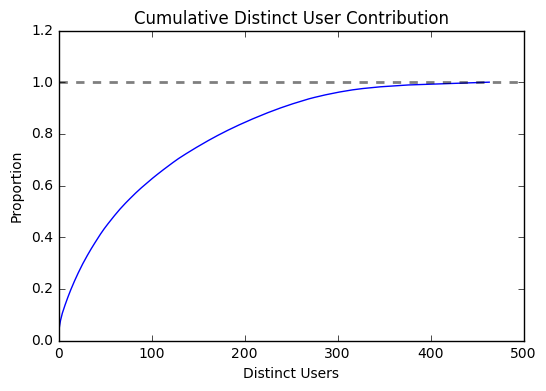

In [167]:
# Cumulative plot showing user contribution
plt.plot(ccdf.cumpct)
plt.plot([0, 500], [1, 1], color='k', linestyle='--', linewidth=2, alpha=0.5)
plt.xlabel('Distinct Users')
plt.ylabel('Proportion')
plt.title('Cumulative Distinct User Contribution')
plt.show()

In [271]:
Counter(df.index.weekday_name)
df['weekday'] = df.index.weekday_name
df['ct'] = [1]*len(df)

datetime
2017-03-31 05:29:38      Friday
2017-03-31 04:38:41      Friday
2017-03-31 04:28:19      Friday
2017-03-31 04:28:13      Friday
2017-03-31 04:27:52      Friday
2017-03-31 04:27:32      Friday
2017-03-31 04:27:07      Friday
2017-03-31 04:27:02      Friday
2017-03-31 04:26:36      Friday
2017-03-31 04:26:27      Friday
2017-03-31 04:26:11      Friday
2017-03-31 04:26:02      Friday
2017-03-31 04:49:35      Friday
2017-03-31 04:32:58      Friday
2017-03-24 01:38:06      Friday
2017-03-24 01:37:58      Friday
2017-03-24 01:37:50      Friday
2017-03-24 01:37:38      Friday
2017-03-24 01:37:29      Friday
2017-03-24 01:37:06      Friday
2017-03-23 02:45:55    Thursday
2017-03-23 02:44:30    Thursday
2017-03-23 02:44:18    Thursday
2017-03-23 02:44:07    Thursday
2017-03-23 02:44:02    Thursday
2017-03-23 02:43:45    Thursday
2017-03-23 02:43:38    Thursday
2017-03-23 02:43:34    Thursday
2017-03-23 02:43:26    Thursday
2017-03-23 02:43:17    Thursday
                         ...   

In [277]:

pd.pivot_table(df, values='ct', index=['hour'], columns=['weekday'], aggfunc=np.sum, margins=True, fill_value=0)

weekday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,All
hour,,,,,,,,
0,137.0,155.0,145.0,216.0,139.0,177.0,95.0,1064.0
1,138.0,106.0,321.0,268.0,46.0,103.0,178.0,1160.0
2,208.0,142.0,217.0,264.0,159.0,96.0,59.0,1145.0
3,53.0,182.0,172.0,66.0,79.0,7.0,22.0,581.0
4,51.0,13.0,39.0,57.0,153.0,4.0,9.0,326.0
5,30.0,4.0,127.0,52.0,22.0,21.0,0.0,256.0
6,0.0,0.0,24.0,96.0,9.0,1.0,0.0,130.0
7,11.0,0.0,21.0,37.0,11.0,0.0,0.0,80.0
9,1.0,0.0,0.0,0.0,0.0,2.0,1.0,4.0
